In [23]:
from preprocess import Preprocess
from kmeans import KMeansClustering
import logging
logging.getLogger().setLevel(logging.INFO)

In [24]:
data_dev = Preprocess.open_csv("F:\Thesis\data\SemEval\hateval2019_en_dev.csv")
data_train = Preprocess.open_csv("F:\Thesis\data\SemEval\hateval2019_en_train.csv")
HS = '0'
TR = '0'
AG = '0'
filtered_dev = Preprocess.filter_sem_eval(X=data_dev, HS=HS, TR=TR, AG=AG)
filtered_train = Preprocess.filter_sem_eval(X=data_train, HS=HS, TR=TR, AG=AG)
filtered_data = filtered_dev + filtered_train
tweets = [x[1] for x in filtered_data]
cleaned_data = Preprocess.clean(X=tweets)
km = KMeansClustering()
X = km.fit_tfidf(cleaned_data)
X = km.fit_lsa(X)

INFO:root:Original data length: 1000
INFO:root:After applying filters: 573
INFO:root:Data length after removing invalid tweets: 122
INFO:root:Original data length: 9000
INFO:root:After applying filters: 5093
INFO:root:Data length after removing invalid tweets: 1030
INFO:root:Explained variance of the SVD step: 28%


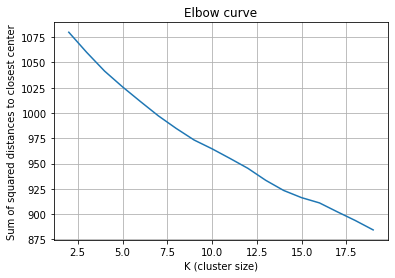

In [25]:
%matplotlib inline
# Lower values are better
km.plot_elbow_curve(max_k=20, X=X)

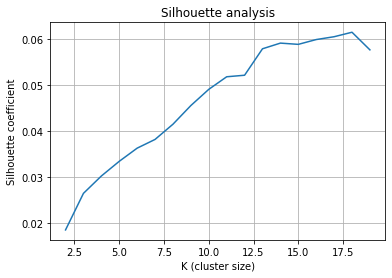

In [26]:
%matplotlib inline
# Higher values are better
km.plot_silhouette_analysis(max_k=20, X=X)

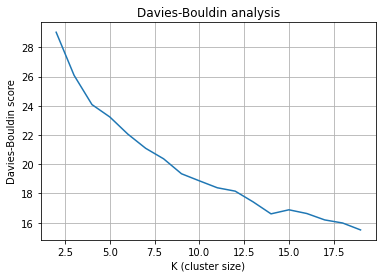

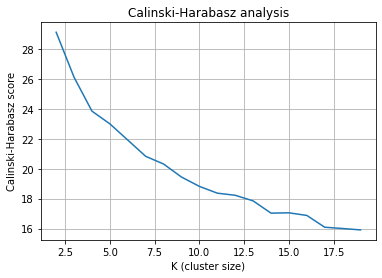

In [29]:
%matplotlib inline
# Lower values are better
km.plot_davies_bouldin_score_analysis(max_k=20, X=X)
# Higher values are better
km.plot_calinski_harabasz_analysis(max_k=20, X=X)

In [27]:
K = 20
km.cluster(X= X, K=K)
km.print_top_terms()

Cluster 0:
 pussy boy boys stfu bitch just eat yeah nigga dont

Cluster 1:
 women rape men sexual assault make stand culture stop help

Cluster 2:
 time ram say hysterical hate hoe way right day fuckin

Cluster 3:
 people migrants illegal countries want stop eu hate waiting country

Cluster 4:
 woman rape hysterical man cunt men victim cory booker married

Cluster 5:
 fuck shut bitch wanna yall cube im brains youre yeah

Cluster 6:
 girl hysterical bitch skank know oh god men guy love

Cluster 7:
 stupid cunt look ho dick bro fuck af single like

Cluster 8:
 men women trash yes say just saying know like instead

Cluster 9:
 life gives just really people real high making lemons best

Cluster 10:
 whore slut bitch skank called ass women calling shit hoe

Cluster 11:
 cause know don relationship ve hate ll playing good used

Cluster 12:
 immigration uk needs immigrants laws country longer illegal fall think

Cluster 13:
 immigrant children song parents illegal kids america families white 

In [28]:
NUM_SAMPLES=5
km.cluster(X= X, K=K)
km.print_most_representative_samples(original_data=filtered_data, X=X, num_samples=NUM_SAMPLES)

Cluster 0: most representative sample indices: [303 307 186 311 177]
['4346', 'How many immigrant kids were reunited with their parent today?', '0', '0', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['4412', 'So the children are still missing that the administration has took from immigrant families and there is a reported case of sexual molestation from and employee who was working at the detention centers where basically the federal government keeps the kidnapped kids smh 🤦🏽\u200d♀️', '0', '0', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['1453', "What is important to you now?  I'm sad for those unfortunate immigrant children who have yet to be reunited with their families.  Mental health ought to be as important as physical health.   #SaveSCOTUS #BlueWave2018 #mentalhealth #health #FamiliesBelongTogether #VoteBlue #Vote", '0', '0', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['4468', 'shoutout to